y-werte: [ 122124.5856  217760.7456  358056.8064  752186.9088 1163223.4176]
x-werte: [1.299e+08 1.999e+08 2.660e+08 4.363e+08 5.835e+08]
log y-werte: [5.0868031  5.33797959 5.55395193 5.87632577 6.06566314]
log x-werte: [8.11360915 8.30081279 8.42488164 8.63978521 8.76604086]


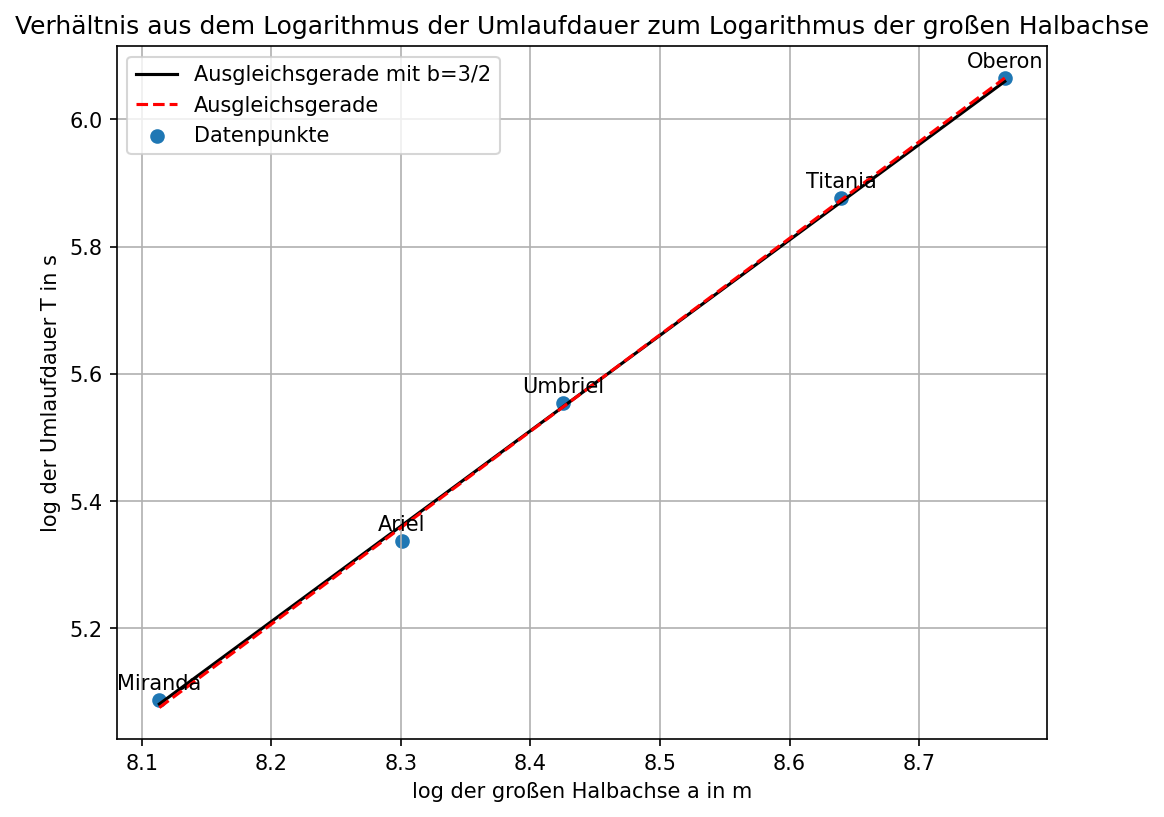

Parameter der Ausgleichsgerade mit freier Steigung: a=-7.229276688235923, b=1.5165560504384683
Parameter der Ausgleichsgerade mit fester Steigung: a=-7.089394188765733, b=1.5


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit

x = [1.2990e5, 1.9990e5, 2.6600e5, 4.3630e5, 5.8350e5]  # große Halbachse in Meter
y = [1.413479, 2.520379, 4.144176, 8.705867, 13.463234]  # Umlaufdauer in Tagen
namen = ['Miranda', 'Ariel', 'Umbriel', 'Titania', 'Oberon']

#ywerte,xwerte = np.loadtxt('Astro3.1.txt', delimiter=',').T             #Werte laden
xwerte = np.array(x)
ywerte = np.array(y)

xwerte=xwerte*10**3                                                   #Werte in Grundeinheiten umrechnen
ywerte=ywerte*24*3600
 
print("y-werte:",ywerte)                                               #Ausgabe der Werte vor dem Logarithmieren
print("x-werte:",xwerte)

ywerte=np.log10(ywerte)                                                #Werte logarithmieren
xwerte=np.log10(xwerte)
            
print("log y-werte:",ywerte)                                           #Ausgabe der logarithmierten Werte
print("log x-werte:",xwerte)



#Erstellen der Ausgleichsgerade                                                                          

def model_f(x, a):                                                   #Funktion der Ausgleichsgerade
    return a + b * x

def model2_f(x, a, b):                                                   #Funktion der Ausgleichsgerade
    return a + b * x

b = 3/2                                                             #Steigung muss 3/2 betragen
  
popt, _=curve_fit(model_f,xwerte,ywerte)                            #Finden der optimalen Ausgleichsgerade durch die Punkte
a = popt[0]

popt2, _=curve_fit(model2_f,xwerte,ywerte)                            #Finden der optimalen Ausgleichsgerade durch die Punkte
a2, b2 = popt2
     
xkoords=np.linspace(xwerte[0],xwerte[-1],100)

plt.figure(figsize=(8,6), dpi=150)                                                  #Erstellen der Grafik


plt.plot(xkoords, a + (b*xkoords), color="black", label="Ausgleichsgerade mit b=3/2") #Zeichnen der Ausgleichsgerade mit Steigung 3/2 und y-Achsenabschnitt a          
plt.plot(xkoords, a2 + (b2*xkoords), color="red", linestyle="dashed", label="Ausgleichsgerade") #Zeichnen der optimalen Ausgleichsgerade mit Steigung b2 und y-Achsenabschnitt a2                                                                 
plt.scatter(xwerte, ywerte, label="Datenpunkte")          #Zeichnen der Datenpunkte
for i, name in enumerate(namen):
    plt.annotate(name, (xwerte[i], ywerte[i]), textcoords="offset points", xytext=(0,5), ha='center')  #Beschriften der Datenpunkte mit Namen der Monde
plt.title("Verhältnis aus dem Logarithmus der Umlaufdauer zum Logarithmus der großen Halbachse")
plt.xlabel("log der großen Halbachse a in m")
plt.ylabel("log der Umlaufdauer T in s")
plt.legend(loc="best")                                                   #Legende einfügen
plt.grid()

plt.show()                                                               #Plot zeigen
print(f"Parameter der Ausgleichsgerade mit freier Steigung: a={a2}, b={b2}")  #Werte der optimalen Ausgleichsgerade anzeigen
print(f"Parameter der Ausgleichsgerade mit fester Steigung: a={a}, b={b} (der in der PDF)")  #Wert des y-Achsenabschnitts der Ausgleichsgerade mit fester Steigung anzeigen